In [1]:
import pandas as pd
%matplotlib inline

# build a network intrusion detector, a predictive model capable of 
# distinguishing between bad connections, called intrusions or attacks, and good normal connections.

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
dataset = pd.read_csv('../data/kddcup.data', header=None, names=col_names)

# Warning, takes a while to load

In [3]:
# Let's start some EDA

dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
dataset.shape

(494021, 42)

In [5]:
# 494,021 ROWS

In [29]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# filter by column, remember .head() gives us the first five columns

dataset['label'].head()

0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: label, dtype: object

In [7]:
dataset['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [8]:
# value counts of top five connection types

dataset['label'].value_counts().head()

smurf.      280790
neptune.    107201
normal.      97278
back.         2203
satan.        1589
Name: label, dtype: int64

In [9]:
# optional parameter normalize=True gives us percentages

dataset['label'].value_counts(normalize=True).head()

smurf.      0.568377
neptune.    0.216997
normal.     0.196911
back.       0.004459
satan.      0.003216
Name: label, dtype: float64

In [32]:
# Let's give our computers a break and focus on only three columns for now

smaller_dataset = dataset[['duration', 'protocol_type', 'label']]

In [11]:
smaller_dataset.head()

,duration,protocol_type,label
0,0,tcp,normal.
1,0,tcp,normal.
2,0,tcp,normal.
3,0,tcp,normal.
4,0,tcp,normal.


In [12]:
smaller_dataset.describe()  # only does quantitative columns by default

,duration
count,494021.000000
mean,47.979302
std,707.746472
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58329.000000


In [13]:
smaller_dataset[['protocol_type', 'label']].describe()

# Force description of categorical types

,protocol_type,label
count,494021,494021
unique,3,23
top,icmp,smurf.
freq,283602,280790


In [30]:
smaller_dataset['protocol_type'].value_counts(normalize=True)

icmp    0.574069
tcp     0.384731
udp     0.041201
Name: protocol_type, dtype: float64

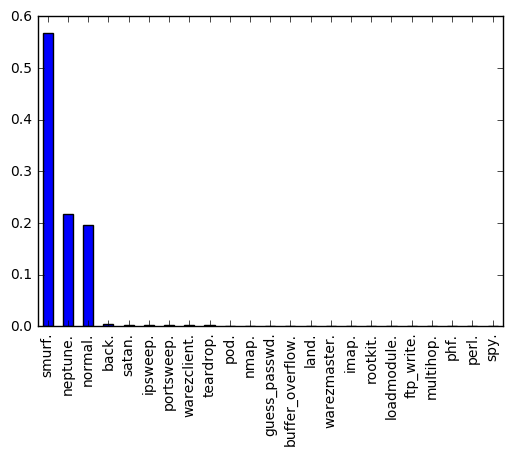

In [15]:
smaller_dataset['label'].value_counts(normalize=True).plot(kind='bar')

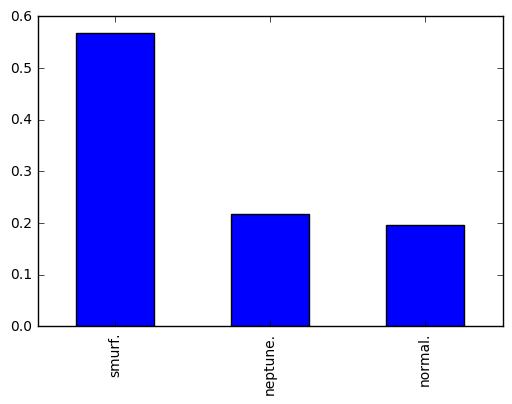

In [16]:
# top three types of connections

smaller_dataset['label'].value_counts(normalize=True).head(3).plot(kind='bar')

## Split Apply Combine

<img src="https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg">

In [17]:
smaller_dataset.groupby('label').duration.mean()
# average duration of connection per type of label

label
back.                  0.128915
buffer_overflow.      91.700000
ftp_write.            32.375000
guess_passwd.          2.716981
imap.                  6.000000
ipsweep.               0.034483
land.                  0.000000
loadmodule.           36.222222
multihop.            184.000000
neptune.               0.000000
nmap.                  0.000000
normal.              216.657322
perl.                 41.333333
phf.                   4.500000
pod.                   0.000000
portsweep.          1915.299038
rootkit.             100.800000
satan.                 0.040277
smurf.                 0.000000
spy.                 318.000000
teardrop.              0.000000
warezclient.         615.257843
warezmaster.          15.050000
Name: duration, dtype: float64

In [18]:
smaller_dataset.groupby('label').duration.mean().sort_values(ascending=False)
# sorted in order of longest average connection first

label
portsweep.          1915.299038
warezclient.         615.257843
spy.                 318.000000
normal.              216.657322
multihop.            184.000000
rootkit.             100.800000
buffer_overflow.      91.700000
perl.                 41.333333
loadmodule.           36.222222
ftp_write.            32.375000
warezmaster.          15.050000
imap.                  6.000000
phf.                   4.500000
guess_passwd.          2.716981
back.                  0.128915
satan.                 0.040277
ipsweep.               0.034483
nmap.                  0.000000
neptune.               0.000000
pod.                   0.000000
land.                  0.000000
smurf.                 0.000000
teardrop.              0.000000
Name: duration, dtype: float64

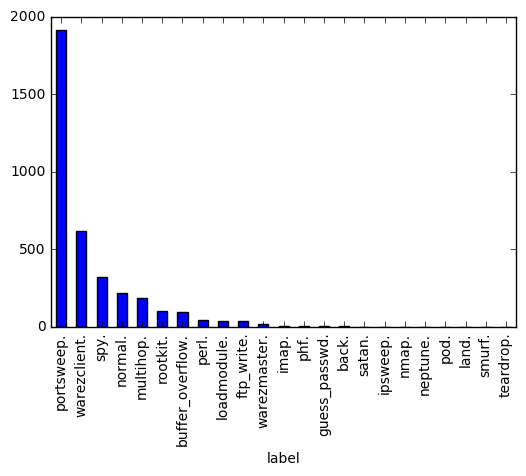

In [19]:
smaller_dataset.groupby('label').duration.mean().sort_values(ascending=False).plot(kind='bar')
# Now as a bar chart

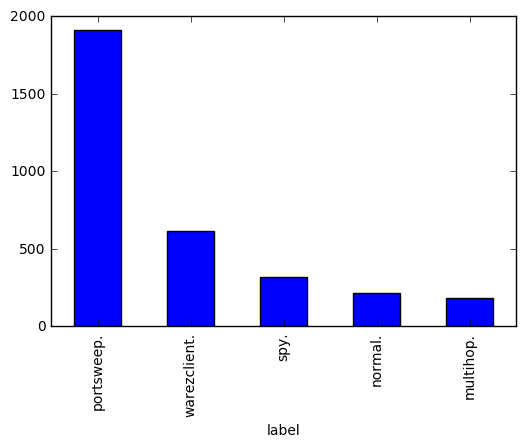

In [20]:
smaller_dataset.groupby('label').duration.mean().sort_values(ascending=False).head(5).plot(kind='bar')
# Now as a bar chart with top five durations

In [21]:
smaller_dataset.groupby('label').protocol_type.value_counts(normalize=True)

label             protocol_type
back.             tcp              1.000000
buffer_overflow.  tcp              1.000000
ftp_write.        tcp              1.000000
guess_passwd.     tcp              1.000000
imap.             tcp              1.000000
ipsweep.          icmp             0.924619
                  tcp              0.075381
land.             tcp              1.000000
loadmodule.       tcp              1.000000
multihop.         tcp              1.000000
neptune.          tcp              1.000000
nmap.             icmp             0.445887
                  tcp              0.445887
                  udp              0.108225
normal.           tcp              0.789624
                  udp              0.197136
                  icmp             0.013240
perl.             tcp              1.000000
phf.              tcp              1.000000
pod.              icmp             1.000000
portsweep.        tcp              0.999038
                  icmp             0.000962


In [33]:
# MACHINE LEARNING TIME

smaller_dataset.head()

,duration,protocol_type,label
0,0,tcp,normal.
1,0,tcp,normal.
2,0,tcp,normal.
3,0,tcp,normal.
4,0,tcp,normal.


In [ ]:
# I want to predict label based on duration and protocol type

# but wait sinan, protocol type is not a number, is that going to be a problem?

In [ ]:
# yes

<img src="images/dummy.png">

In [24]:
protocol_dummies = pd.get_dummies(dataset['protocol_type'], prefix='proto_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
smaller_dataset = pd.concat([smaller_dataset, protocol_dummies], axis=1)
smaller_dataset.head()

,duration,protocol_type,label,proto__tcp,proto__udp
0,0,tcp,normal.,1.0,0.0
1,0,tcp,normal.,1.0,0.0
2,0,tcp,normal.,1.0,0.0
3,0,tcp,normal.,1.0,0.0
4,0,tcp,normal.,1.0,0.0


In [26]:
X = smaller_dataset.drop(['label', 'protocol_type'], axis=1)  # drop the label column in order to make our features
y = smaller_dataset.label

In [27]:
# first let's calculate our null accuracy
y.value_counts(normalize=True).head(1)

smurf.    0.568377
Name: label, dtype: float64

In [ ]:
# warning: fairly slow

from sklearn.neighbors import KNeighborsClassifier  # import class
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
knn.score(X, y)

In [ ]:
scores = []
for k in range(1, 9, 2):
    print "fitting for", k, ':   ',
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    score knn.score(X, y)
    print "score is", score
    scores.append(score)
    